## Linear Regression on Boston Housing Dataset

We will take the Housing dataset which contains information about different houses in Boston. There are 506 samples and 13 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features.

In [192]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
# define column names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [194]:
# load data, check pandas.read_csv usage: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
boston = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

In [195]:
print("Boston housing dataset has {} data points with {} variables each.".format(*boston.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [196]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### The features can be summarized as follows:

CRIM: Per capita crime rate by town<br />
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br />
INDUS: Proportion of non-retail business acres per town<br />
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br />
NOX: Nitric oxide concentration (parts per 10 million)<br />
RM: Average number of rooms per dwelling<br />
AGE: Proportion of owner-occupied units built prior to 1940<br />
DIS: Weighted distances to five Boston employment centers<br />
RAD: Index of accessibility to radial highways<br />
TAX: Full-value property tax rate per 10,000 dollars<br />
PTRATIO: Pupil-teacher ratio by town<br />
B: the proportion of people of African American descent by town<br />
LSTAT: Percentage of lower status of the population<br />
MEDV: Median value of owner-occupied homes in $1000s<br />

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [197]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [198]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


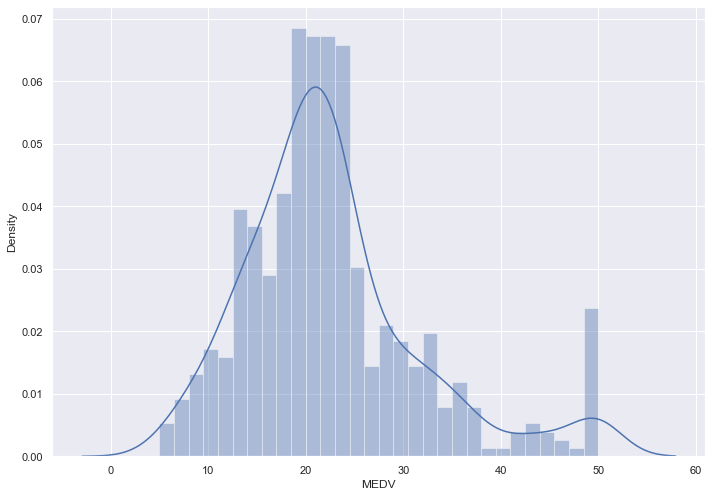

In [199]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers. You can also use the histogram plot function from the matplotlib library.

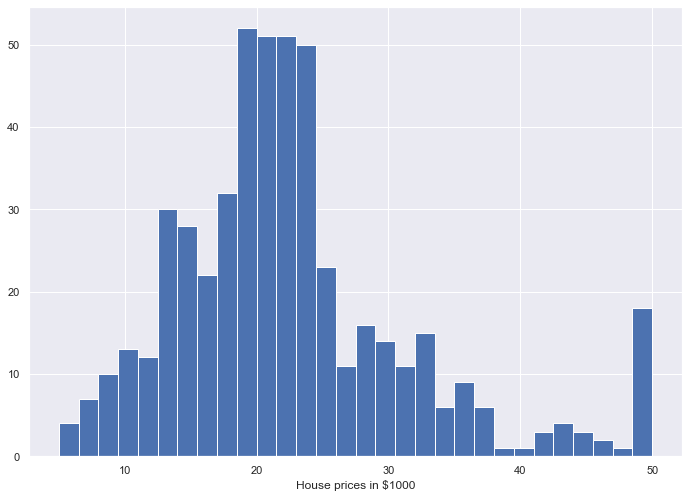

In [200]:
plt.hist(boston['MEDV'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

Let's see how these features plus MEDV distributions looks like

In [201]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

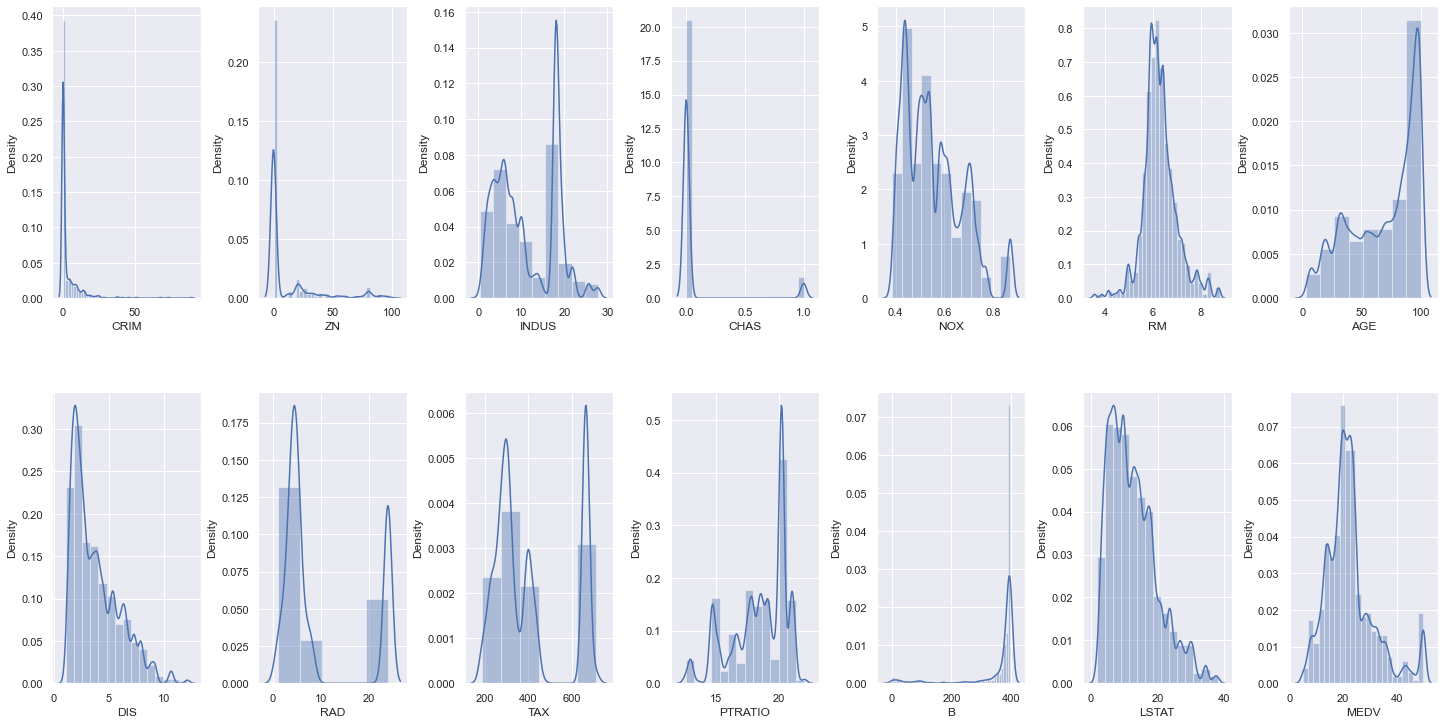

In [202]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [203]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


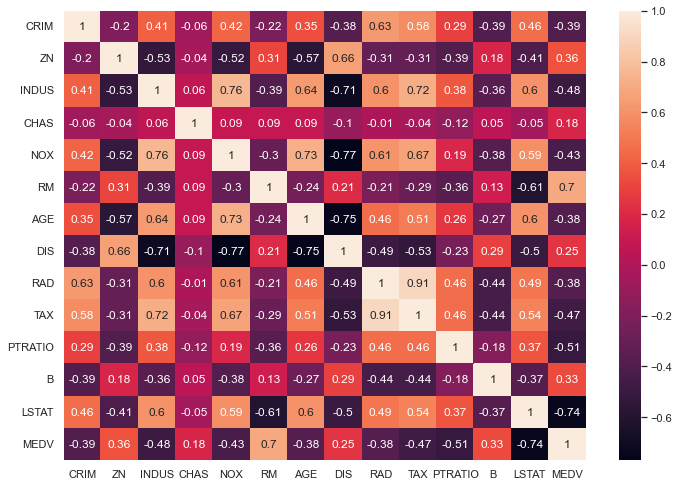

In [204]:
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

## Build A Linear Regression

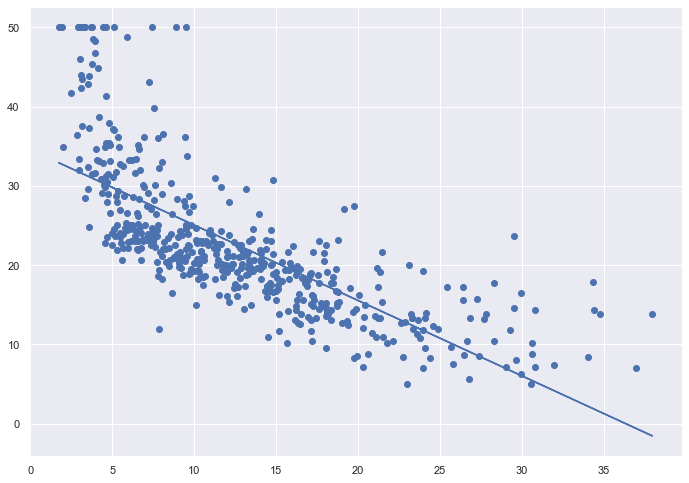

In [205]:
import matplotlib.pyplot as plt
from scipy import stats

x = boston['LSTAT']
y = boston['MEDV']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

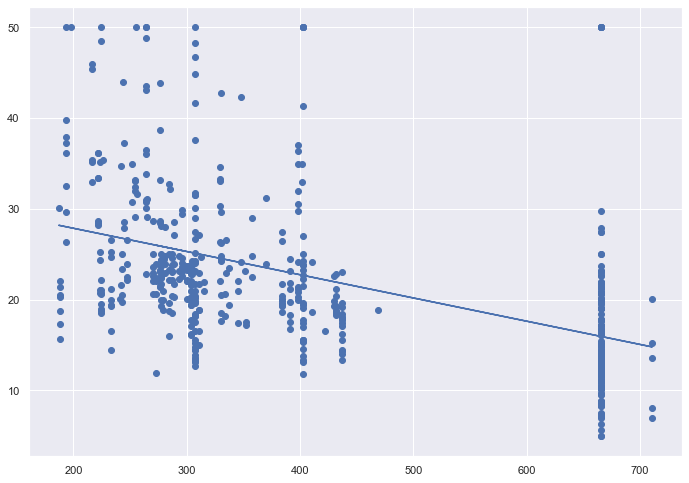

In [206]:
x = boston['TAX']
y = boston['MEDV']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

How well does my data fit in a linear regression?

In [207]:
from scipy import stats

x = boston['LSTAT']
y = boston['MEDV']

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.737662726174015


In [208]:
x = boston['RM']
y = boston['MEDV']

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.6953599470715396


In [209]:
features = ['LSTAT', 'RM','MEDV']
boston = boston.loc[:,features]
boston.shape

(506, 3)

### Multiple Linear Regression

Setting the value for X and Y

#data preprocessing
X = boston.iloc[:, :-1].values  #independent variable array
y = boston.iloc[:,1].values  #dependent variable vector

In [234]:
import math
X = boston['LSTAT']
y = boston['MEDV']
I = range(boston.index.size)
J = range(boston.columns.size)
i = 0
j = 0
for i in I:
    for j in J:
        boston.iloc[i,j]=math.sqrt(boston.iloc[i,j])


Splitting the dataset into train and test set

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [237]:
# Standardisation
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss_train = ss.fit_transform(X_train.values.reshape(-1,1))
X_ss_test = ss.transform(X_test.values.reshape(-1,1))

### Implementing the linear model

Fitting the Linear Regression model

In [238]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_ss_train, y_train)

LinearRegression()

In [240]:
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])
coeff_df

,Coefficient
0,-0.184478


Making Predictions

In [241]:
y_pred = regressor.predict(X_ss_test)

In [242]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
329,2.180354,2.270282
371,2.659148,2.195736
219,2.189939,2.166801
403,1.697343,1.959647
78,2.145774,2.117013
...,...,...
56,2.229329,2.334814
455,1.937781,1.989968
60,2.079507,2.096853
213,2.302378,2.200406


In [243]:
#Intercept and Coefficient
print(regressor.intercept_)
print(regressor.coef_)

2.147747442491403
[-0.18447805]


In [244]:
#Prediction of test set
y_pred = regressor.predict(X_ss_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [2.27028224 2.19573645 2.16680054 1.95964676 2.1170134  2.23000413
 2.14034424 2.2032348  2.10943384 2.16307683 1.94466859 1.93437231
 1.99650958 1.82709627 2.58507195 2.38473135 2.15995259 2.42117979
 2.35524577 2.21999375 2.27559006 2.12499222 2.07459194 2.27597215
 2.17523359 2.09249961 2.08063488 2.03701472 2.41366782 2.01027873
 1.99188231 2.06073573 2.17700073 2.11548652 2.21120169 2.0620793
 1.84819147 2.21638763 1.99942545 1.88778555 2.22630323 2.07320931
 2.20959521 1.98977691 2.22396661 2.20799534 2.03595645 2.05144413
 1.81345337 2.1991554  2.05363868 2.00020615 2.13498589 2.45445408
 2.00590642 2.0387132  2.11472516 2.10868333 2.17818319 2.00669827
 2.25371994 2.10718631 2.37851986 2.44046723 2.05939627 2.39427357
 1.9976737  1.94762667 1.95946776 2.15629109 2.12655428 2.21443475
 2.38840938 2.39159502 2.25552418 1.77863869 2.42887348 2.15349683
 2.21867853 2.07436119 2.26915474 2.0632021  2.12240173 2.41769075
 2.3905297  2.31808828 2.14332132 2.03

In [245]:
#Actual value and the predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
329,2.180354,2.270282
371,2.659148,2.195736
219,2.189939,2.166801
403,1.697343,1.959647
78,2.145774,2.117013
...,...,...
56,2.229329,2.334814
455,1.937781,1.989968
60,2.079507,2.096853
213,2.302378,2.200406


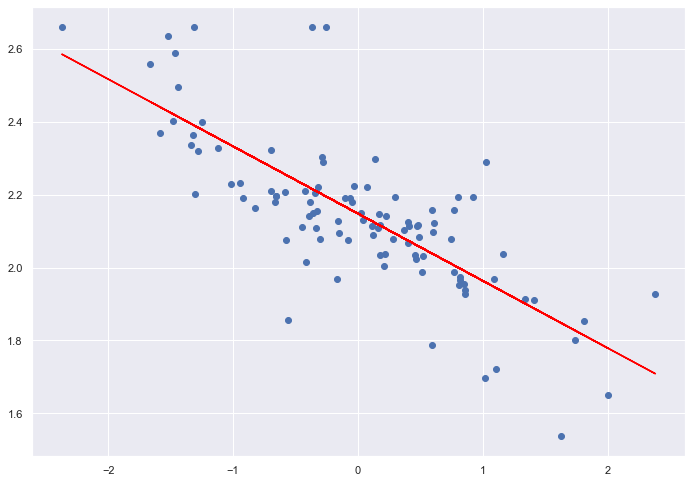

In [246]:
#Line of best fit
plt.scatter(X_ss_test,y_test)
plt.plot(X_ss_test, y_pred, 'RED')
plt.show()

The above straight line is the best approximation of the given dataset.

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

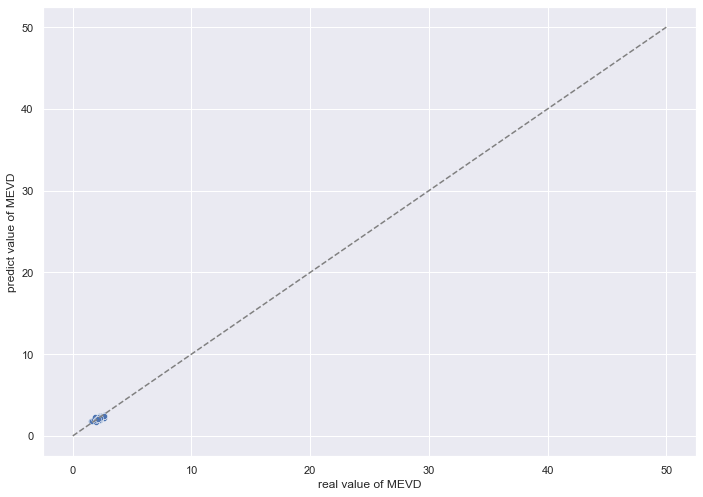

In [247]:
# Prediction
sns.scatterplot(y_test, y_pred)
plt.xlabel("real value of MEVD")
plt.ylabel("predict value of MEVD")
plt.xticks()
plt.yticks()
plt.plot([0, 50], [0, 50], '--k', color="gray")
plt.plot()

### Evaluating the Model

In [253]:
from sklearn import metrics
print('R squared:', regressor.score(X_ss_test,y_test)*100)
print('R squared:', regressor.score(X_ss_train,y_train)*100)

R squared: 59.154099258365555
R squared: 71.12837689499685


In [249]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09414529306388555
Mean Squared Error: 0.017520466078608923
Root Mean Squared Error: 0.1323648974562702


R Squared: R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 81.10, which indicates that 81.10% of the data fit the regression model.

Mean Absolute Error: Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 1.648, which is pretty good as it is close to 0.

Mean Square Error: Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 4.077, which is pretty good.

Root Mean Square Error: Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 2.019, which is pretty good.

The Simple Linear Regression model performs well as XXX% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are less.

### Single Linear Regression - Preparing the Data

In [ ]:
list1 = np.ndarray.tolist(boston['RAD'])
list2 = np.ndarray.tolist(boston['MEDV'])

In [ ]:
from sklearn.linear_model import LinearRegression
X = list1.iloc[:, :-1].values
y = list2.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)
x = np.linspace(-10,10,100)

In [ ]:
y = 0.85*x - 0.72

e = np.random.normal(loc = 0,scale = 0.5,size = x.shape)

y += e

In [ ]:
x= x.reshape(-1,1)

lr = LinearRegression()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
print('coefficient',lr.coef_)

print('intercept',lr.intercept_)

In [ ]:
y_hat = lr.predict(X_test)

In [ ]:
print("real value:",y_test.ravel()[:10])

print("expection":",y_hat[:10])

In [ ]:
import matplotlib as mpl

import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams["font.family"] = "SimHei"

mpl.rcParams["axes.unicode_minus"] =False

In [ ]:
plt.scatter(X_train,y_train,s = 15,label = 'train')

plt.scatter(X_test,y_test,s = 15,label = 'test')

In [ ]:
plt.plot(x,lr.predict(x),"r-")    #line plot

In [ ]:
plt.legend()    #explenation

In [ ]:
plt.figure(figsize = (15,5))

plt.plot(y_test,label = "actual",color = "r",marker = "o")

plt.plot(y_hat,label = "expected",color = "g",marker = "o")

plt.xlabel("number")

plt.ylabel("value")

plt.legend()